**Lab -1 - ONLINE GRADIENT ALGORITHM**


**Reminder on convex functions**

We remind that a function $F:\mathbb{R}^k\rightarrow \mathbb{R}$ is said to be convex iff $\forall x,y\in\mathbb{R}^k,\forall \alpha\in[0,1], F(\alpha x + (1-\alpha)y) \leq \alpha F(x) + (1-\alpha) F(y)$.

Given a function $F:\mathbb{R}^k\rightarrow \mathbb{R}$ we define the sub-gradient of $F$ at $x$ as $\partial F(x) = \{y\in\mathbb{R}^k,\forall z\in \mathbb{R}^k: F(z)-F(x) \geq \left<y,z-x\right>\}$. A few well-known facts: when $F$ is convex, $F(x) \neq \emptyset$ for any $x$; when $F$ is convex and differentiable at $x$, $\partial F(x) = \left\{\frac{{\rm d} F}{{\rm d}x}(x)\right\}$; when $F$ is convex and $L$-Lipschitz then $\forall y \in \partial F(x)$, $\|y\|\leq L$.

**Online gradient algorithm**

Context: $f_1,\dots,f_M$ and $\mathcal{F}={\rm span}(f_1,\dots,f_M)$, that is L-type aggregation. Notation: $f(\cdot)=(f_1(\cdot),\dots,f_M(\cdot))$ so that $\mathcal{F}=\{\left<\alpha,f(\cdot)\right>,\alpha\in\mathbb{R}^M\}$. Also $\mathcal{F}_B := \{\left<\alpha,f(\cdot)\right>,\|\alpha\|\leq B\}$. Finally $[(x_t,y_t)]_{t\in\mathbb{N}^*}$ any sequence in $(\mathcal{X}\times\mathbb{R})^{\mathbb{N}^*}$. Finally, any loss function $\ell$ such that $\forall t$, $\ell(y_t,\cdot)$ is a convex function.

Initialization: $\theta_1 = 0$, $\eta>0$.

Step $t$: put $\hat{y}_t = \left<\theta_t,f(x_t)\right>$. Once $y_t$ is revealed, define $g_t(\theta)=\ell(y_t,\left<\theta,f(x_t)\right>)$, $z_t \in \partial g_t (\theta_t)$ and $\theta_{t+1} = \theta_t - \eta z_t$.

**Regret bound for the online gradient algorithm**

_Theorem_: assume that $\forall t$, $\ell(y_t,\cdot)$ is also $L$-Lipschitz. Then for any $T\in\mathbb{N}^*$
$$
\sum_{t=1}^T \ell(y_t,\hat{y}_t) \leq \inf_{\theta\in\mathbb{R}^M} \left\{ \sum_{t=1}^T \ell(y_t,\left<\theta,f(x_t)\right>) + \eta T L^2 + \frac{\|\theta\|^2}{2\eta} \right\}.
$$
So, as a special case,
$$
\mathcal{R}_T(\mathcal{F}_B) \leq \eta T L^2 + \frac{B^2}{2\eta}
$$
and in this case, the choice $\eta=\frac{B}{L\sqrt{2T}}$ leads to
$$
\mathcal{R}_T(\mathcal{F}_B) \leq BL\sqrt{2T}.
$$

_Proof_: in class, or in the references.

_Remark_: if you want to win the game without having to know $T$ in advance, you can use the so-called doubling trick: use the gradient algorithm on the interval $2^{N} \leq t < 2^{N+1}$ for each integer $N\in\mathbb{N}$. On each interval, the time horizon is known, it is $2^{N+1}-2^N=2^N$ and so set $\eta=B/(2^{\frac{N+1}{2}}L)$. Simple calculations show that this produces a sequence $\hat{y}_t$ with $\mathcal{R}_T(\mathcal{F}_B) \leq \frac{2BL\sqrt{T}}{\sqrt{2}-1}$, so we only lose a constant factor.

**Example**

In classification problems, all the $y_t$'s are in $\{-1,+1\}$, one would like to use the zero/one loss: $\ell(y_t,\left<\theta,f(x_t)\right>)=\mathbf{1}({\rm sign}(\left<\theta,f(x_t)\right>) \neq y_t)$ but it is not convex. It is classical to replace it by a convex surrogate. Here, we propose the hinge loss: $\ell(y,y')=(1-yy')_+$. Consider then $g_t(\theta)=\ell(y_t,\left<\theta,f(x_t)\right>)$. We obtain $\partial g_t(\theta_t) = \{0\}$ if $y_t\left<\theta_t,f(x_t)\right> >1$, $g_t(\theta_t) = \{-y_t f(x_t)\}$ if $y_t\left<\theta_t,f(x_t)\right><1$. In the case $y_t\left<\theta_t,f(x_t)\right>=1$, $g_t(\theta_t)$ is the full segment $[0,-y_t f(x_t)]$. So, for the algorithm, we can simply update:
$$ \theta_{t+1} = \theta_t + \eta y_t f(x_t) \text{ if } y_t\left<\theta_t,f(x_t)\right><1 \text{, }
  \theta_{t+1} = \theta_t \text{ otherwise.}$$
  
Let us now run this algorithm on a real dataset. First, set $\eta>0$.

In [18]:
eta = 0.01

This dataset is taken from the machine learning repository http://archive.ics.uci.edu/ml/ It is the white wine dataset: we compare this result to the trivial strategy that always return $5$ as an output.

In [6]:
from pylab import *
from numpy import *
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data

wine = read_csv('winequality-white.csv',sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Convert Data

wine = wine.values
n,k = shape(wine)
x = wine[:,1:(k-2)]
x = x/mean(x,0)
constant = ones((n,1))
x = concatenate((x,constant),axis=1)
y = wine[:,k-1]


### Implementation of Online Gradient

In [25]:
# Algorithme gradient

def OnlineGradient(eta,x,y):
    Theta = np.zeros(x.shape[1])
    Theta_ = []
    Error = [0]
    T = x.shape[0] 
    for t in range(T):
        y_t = y[t]
        # Gradient 
        g = y_t - np.dot(Theta,x[t,:])
        if (g> 0):
            z_t = -x[t,:]
        if (g < 0):
            z_t = x[t,:]
        if (g == 0): 
            l = np.random.rand(0,1)
            z_t = -l*x[t,:]+(1-l)*x[t,:]
                         
        Theta = Theta - eta*z_t
        Theta_ = np.append(Theta_,Theta)
        loc=Error[t]
        Error = np.append(Error,loc+np.abs((y_t - np.dot(Theta,x[t,:]))))

    return Theta_,Error
     

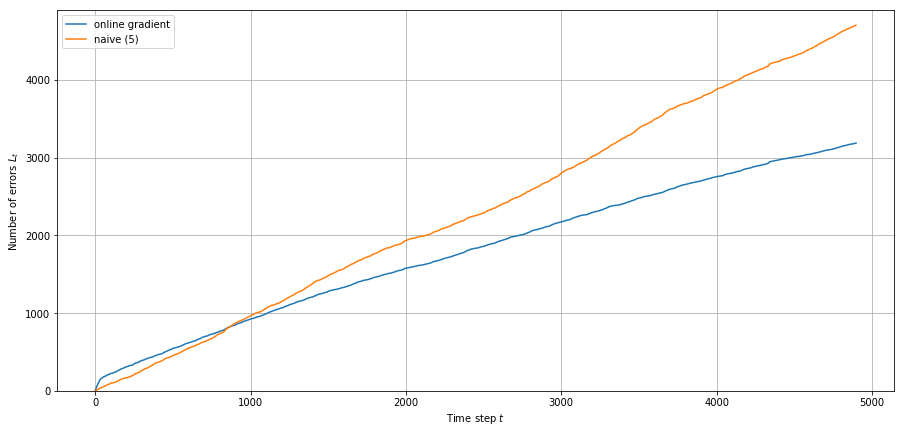

In [27]:

eta = 0.01

naive = cumsum(abs(y-5))
_,online_grad = OnlineGradient(eta,x,y)
                         
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(0,n)
l1, = plt.plot(online_grad)
l2, = plt.plot(naive)
plt.legend([l1,l2],['online gradient','naive (5)'])
plt.grid(True,which="both")
plt.xlabel(r"Time step $t$")
plt.ylabel(r"Number of errors $L_t$")
plt.show()


Let's take $\eta_t$ depends on time $t$

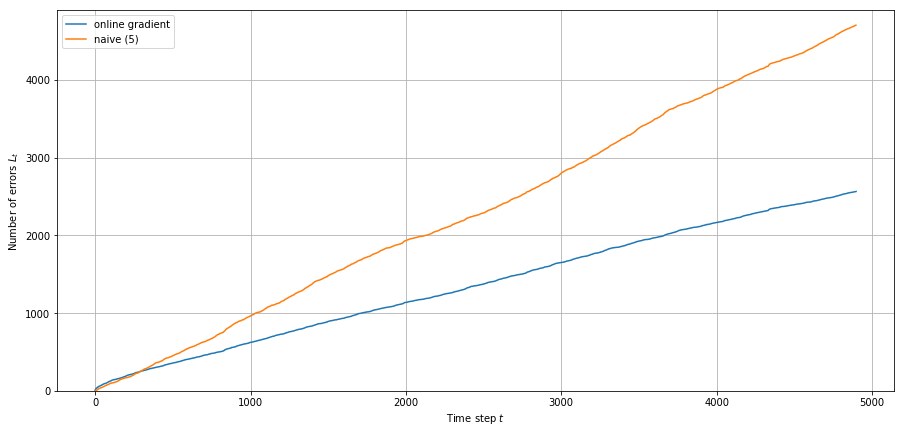

In [28]:
eta = 1/sqrt(arange(n)+1)

# Algorithme gradient - eta depends on t

def OnlineGradient_t(eta,x,y):
    Theta = np.zeros(x.shape[1])
    Theta_ = []
    Error = [0]
    T = x.shape[0] 
    for t in range(T):
        y_t = y[t]
        # Gradient 
        g = y_t - np.dot(Theta,x[t,:])
        if (g> 0):
            z_t = -x[t,:]
        if (g < 0):
            z_t = x[t,:]
        if (g == 0): 
            l = np.random.rand(0,1)
            z_t = -l*x[t,:]+(1-l)*x[t,:]
                         
        Theta = Theta - eta[t]*z_t
        Theta_ = np.append(Theta_,Theta)
        loc=Error[t]
        Error = np.append(Error,loc+np.abs((y_t - np.dot(Theta,x[t,:]))))

    return Theta_,Error
     

naive = cumsum(abs(y-5))
_,online_grad = OnlineGradient_t(eta,x,y)

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(0,n)
l1, = plt.plot(online_grad)
l2, = plt.plot(naive)
plt.legend([l1,l2],['online gradient','naive (5)'])
plt.grid(True,which="both")
plt.xlabel(r"Time step $t$")
plt.ylabel(r"Number of errors $L_t$")
plt.show()


**Remark: online to batch bound**

Assume that we have a sample $[(X_i,Y_i)]_{1\leq i\leq n}$ i.i.d from a probability distribution $P$. Even if we are in the batch setting, we can still run the online gradient algorithm. It will produce a sequence of predictions $\hat{Y}_1,\dots,\hat{Y}_n$ but these are of course useless. However it will also produce a sequence of parameters $\theta_1,\dots,\theta_n$. Let us put $\hat{f}(\cdot)= \left< \frac{1}{n}\sum_{i=1}^n \theta_i, f(\cdot)\right> $. Then we have:

_Theorem_: if $\forall y$, $\ell(y,\cdot)$ is $L$-Lipschitz, set $\eta=\frac{B}{L\sqrt{2n}}$ and then
$$ \mathbb{E}\left( R(\hat{f}) \right) \leq \inf_{f\in\mathcal{F}_B} R(f) + \frac{BL\sqrt{2}}{\sqrt{n}} .$$


**References**

This chapter is essentially based on Section 2 in

S. Shalev-Shwartz, Online Learning and Online Convex Optimization, _Foundations and Trends in Machine Learning_, 4(2), pp. 107-194 (2011).